In [1]:
import os
import tensorflow as tf
import random
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Layer
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
import fnmatch

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression

In [90]:
# import numpy as np
# import os
# import random
# import tensorflow as tf # 2.2.0

# SEED = 42
# os.environ['PYTHONHASHSEED']=str(SEED)
# os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # TF 2.1
# random.seed(SEED)
# np.random.seed(SEED)
# tf.random.set_seed(SEED)

In [3]:
import cv2
import pandas as pd
from tensorflow.keras.layers import BatchNormalization
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials, anneal
import matplotlib.pyplot as plt
import statistics 

In [4]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.applications.xception import  Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
#from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from keras.applications.mobilenet import MobileNet
import tensorflow.keras.callbacks as kcallbacks
import tensorflow.keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
seed=24
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
import seaborn as sns

In [94]:
print("TensorFlow version:", tf.__version__)
#print("Keras version:", keras.__version__)

TensorFlow version: 2.8.0


In [6]:
target_img = (224,224)
input_img = (224,224,3)
batch = 32

train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)
                               

train_generator = train_datagen.flow_from_directory(
        'All Features/Train_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')
validation_generator = valid_datagen.flow_from_directory(
        'All Features/Test_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')

Found 1391 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [7]:
label = {v: k for k, v in validation_generator.class_indices.items()}
print(label)

{0: '0', 1: '1'}


In [8]:
directory = './All Features/Test_224x224/'

test_images = []

for subdir, _, files in os.walk(directory):
    for file in files:
        if fnmatch.fnmatch(file, '*.png'):
            test_images.append(os.path.join(subdir, file))

test_labels = [os.path.basename(os.path.dirname(image_path)) for image_path in test_images]

print(test_labels[0], test_images[0])

1 ./All Features/Test_224x224/1/357.png


In [9]:
y_test = np.array(test_labels).astype(int)
print(y_test.shape)

(652,)


In [10]:
#Test Images 
length = len(test_images)
batch_size = length  # Set the batch size equal to the number of images

# Create an empty array to store the images
images = np.empty((batch_size, 224, 224, 3), dtype=np.float32)

for i in range(length):
    test = cv2.imread(test_images[i])
    test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
    img = np.array(test) / 255.0
    
    # Assign the image to the corresponding index in the images array
    images[i] = img

In [11]:
images.shape

(652, 224, 224, 3)

In [12]:
output_unit = 1

In [13]:
def Prediction(vgg_model):
#read images from validation folder
    directory = './All Features/Test_224x224/'

    image_files = []

    for subdir, _, files in os.walk(directory):
        for file in files:
            if fnmatch.fnmatch(file, '*.png'):
                image_files.append(os.path.join(subdir, file))

    test_labels = [os.path.basename(os.path.dirname(image_path)) for image_path in image_files]
            
    y_test = np.array(test_labels).astype(int)

    # #predict=[]
    # #length=len(test_images)
    # label=validation_generator.class_indices
    # label={v: k for k, v in label.items()}
    
    length = len(test_images)
    batch_size = length  # Set the batch size equal to the number of images

    # Create an empty array to store the images
    images = np.empty((batch_size, 224, 224, 3), dtype=np.float32)

    for i in range(length):
        test = cv2.imread(test_images[i])
        test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
        img = np.array(test) / 255.

        # Assign the image to the corresponding index in the images array
        images[i] = img
    
    preds = vgg_model.predict(images)
    prediction = (preds > 0.5).astype(int)
    accuracy1 = accuracy_score(y_test, prediction)
    print(accuracy1)
    
    return accuracy1

# Tree Parzen Estimator (Bayesian Optimization)

In [14]:
def Prediction_Model(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Saved Models w All Features/VGG16_tpe.h5',input_shape=input_img):
    
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='tpe')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [15]:
#15-18
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Prediction_Model(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(vgg_model=load_model('./Saved Models w All Features/VGG16_tpe.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [16]:
space = {
    'frozen': hp.quniform('frozen', 15, 18, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))


Epoch 1/10                                            

  0%|          | 0/10 [00:01<?, ?trial/s, best loss=?]

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                      
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 14s - loss: 0.8979 - accuracy: 0.6096 - val_loss: 0.6880 - val_accuracy: 0.5506 - 14s/epoch - 317ms/step

Epoch 2/10                                            

                                                      
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 6s - loss: 0.6545 - accuracy: 0.6808 - val_loss: 0.6956 - val_accuracy: 0.5506 - 6s/epoch - 135ms/step

Epoch 3/10                                            

                                                      
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 6s - loss: 0.6313 - accuracy: 0.6808 - val_loss: 0.7102 - val_accuracy: 0.5506 - 6s/epoch - 139ms/step

Epoch 4/10                                            

                                                      
Epoch 4: val_accuracy did not improve from 0.55061

44/44

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.81442, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 1.7468 - accuracy: 0.8109 - val_loss: 0.3929 - val_accuracy: 0.8144 - 7s/epoch - 158ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.81442 to 0.85276, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 0.0528 - accuracy: 0.9849 - val_loss: 0.4151 - val_accuracy: 0.8528 - 6s/epoch - 139ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.85276 to 0.86196, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.84202, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 1.5180 - accuracy: 0.8864 - val_loss: 1.7712 - val_accuracy: 0.8420 - 7s/epoch - 170ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.84202

44/44 - 5s - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.5751 - val_accuracy: 0.8359 - 5s/epoch - 117ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.84202 to 0.91718, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 0.0214 - accuracy: 0.9950 - val_loss: 0.1387 - val_accuracy: 0.9

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.84969, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 0.5193 - accuracy: 0.8835 - val_loss: 0.5198 - val_accuracy: 0.8497 - 7s/epoch - 162ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.84969 to 0.86196, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.3175 - val_accuracy: 0.8620 - 6s/epoch - 137ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.86196 to 0.86350, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.79755, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 8s - loss: 0.3488 - accuracy: 0.9209 - val_loss: 0.6007 - val_accuracy: 0.7975 - 8s/epoch - 185ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.79755 to 0.85123, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 0.0248 - accuracy: 0.9914 - val_loss: 0.6101 - val_accuracy: 0.8512 - 6s/epoch - 141ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.85123 to 0.93712, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.80521, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 8s - loss: 0.6702 - accuracy: 0.9101 - val_loss: 0.8879 - val_accuracy: 0.8052 - 8s/epoch - 174ms/step

Epoch 2/30                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.80521 to 0.86810, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.5279 - val_accuracy: 0.8681 - 7s/epoch - 149ms/step

Epoch 3/30                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.86810 to 0.87577, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.84049, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 2.4410 - accuracy: 0.8713 - val_loss: 1.3862 - val_accuracy: 0.8405 - 7s/epoch - 161ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.84049 to 0.85429, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 12s - loss: 0.0826 - accuracy: 0.9792 - val_loss: 0.7432 - val_accuracy: 0.8543 - 12s/epoch - 281ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.85429

44/44 - 5s - loss: 0.0282 - accuracy: 0.9885 - val_loss: 0.5438 - val_accuracy: 0

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.94172, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 0.7270 - accuracy: 0.7850 - val_loss: 0.1523 - val_accuracy: 0.9417 - 7s/epoch - 169ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.94172 to 0.95245, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 0.0676 - accuracy: 0.9842 - val_loss: 0.1459 - val_accuracy: 0.9525 - 7s/epoch - 158ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.95245 to 0.98773, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                               
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 8s - loss: 13.1377 - accuracy: 0.6405 - val_loss: 0.6917 - val_accuracy: 0.5506 - 8s/epoch - 174ms/step

Epoch 2/25                                                                     

                                                                               
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.6361 - accuracy: 0.6808 - val_loss: 0.7133 - val_accuracy: 0.5506 - 5s/epoch - 124ms/step

Epoch 3/25                                                                     

                                                                               
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.7158 - accuracy: 0.6736 - val_loss: 0.7292 - val_accuracy: 0.5506 - 5s/epoch - 124ms/step

Epoch 4/25                                  

<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                               
Epoch 1: val_accuracy improved from -inf to 0.59816, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 7s - loss: 0.5990 - accuracy: 0.8102 - val_loss: 3.2104 - val_accuracy: 0.5982 - 7s/epoch - 164ms/step

Epoch 2/20                                                                     

                                                                               
Epoch 2: val_accuracy improved from 0.59816 to 0.91564, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 0.1785 - accuracy: 0.9353 - val_loss: 0.1562 - val_accuracy: 0.9156 - 6s/epoch - 145ms/step

Epoch 3/20                                                                     

                                                                               
Epoch 3: val_accuracy improved from 0.91564 to 0.97086, saving model to ./Saved Models w All Features/VGG16_tpe.h5

44/44 - 6s - loss: 0.0301 - a

In [19]:
Prediction_Model(output_unit = 1, frozen=16, unit = 128, epochs=20, patience=10, lr=0.001, dropout_rate=0.2, verbose=1)

Epoch 1/20


<ipython-input-14-d78786ceccbd>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.8289
Epoch 1: val_accuracy improved from -inf to 0.79448, saving model to ./Saved Models w All Features/VGG16_tpe.h5
44/44 [==============================] - 7s 150ms/step - loss: 0.6311 - accuracy: 0.8289 - val_loss: 0.7945 - val_accuracy: 0.7945
Epoch 2/20
44/44 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9835
Epoch 2: val_accuracy did not improve from 0.79448
44/44 [==============================] - 6s 133ms/step - loss: 0.0698 - accuracy: 0.9835 - val_loss: 2.0596 - val_accuracy: 0.7669
Epoch 3/20
44/44 [==============================] - ETA: 0s - loss: 0.1373 - accuracy: 0.9655
Epoch 3: val_accuracy improved from 0.79448 to 0.89264, saving model to ./Saved Models w All Features/VGG16_tpe.h5
44/44 [==============================] - 6s 139ms/step - loss: 0.1373 - accuracy: 0.9655 - val_loss: 0.2118 - val_accuracy: 0.8926
Epoch 4/20
44/44 [==============================] - ETA: 0

In [20]:
model1 = load_model('./Saved Models w All Features/VGG16_tpe.h5')

In [21]:
prediction1 = model1.predict(images)
prediction1 = (prediction1 > 0.5).astype(int)

In [22]:
accuracy1 = accuracy_score(y_test, prediction1)
precision1 =precision_score(y_test, prediction1, average='weighted')
recall = recall_score(y_test, prediction1, average='weighted')
f1 = f1_score(y_test, prediction1, average='weighted')

output = (
    "Evaluation Metrics of VGG16_TPE:\n"
    f"Testing Accuracy: {accuracy1 * 100}\n"
    f"Precision: {precision1}\n"
    f"Recall: {recall}\n"
    f"F1-Score: {f1}"
)

print(output)

Evaluation Metrics of VGG16_TPE:
Testing Accuracy: 98.31288343558282
Precision: 0.9831543431585567
Recall: 0.9831288343558282
F1-Score: 0.9831205260664353


In [23]:
target_names = ['Normal', 'Attack']
print(classification_report(y_test, prediction1, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98       293
      Attack       0.98      0.99      0.98       359

    accuracy                           0.98       652
   macro avg       0.98      0.98      0.98       652
weighted avg       0.98      0.98      0.98       652



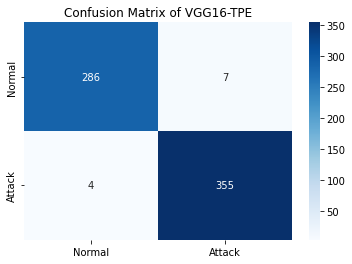

In [24]:
target_names = ['Normal', 'Attack']
conf_mat1 = confusion_matrix(y_test, prediction1)
sns.heatmap(conf_mat1, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG16-TPE')
plt.show()

# Simulated Annealing

In [25]:
def Prediction_Model(output_unit, frozen, unit, epochs,patience, lr, dropout_rate,verbose=2, savepath='./Saved Models w All Features/VGG16_simulated.h5',input_shape= input_img):
    
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True
        
    model = Flatten()(base_model.output)
    model = Dense(units = unit,activation='relu')(model)
    model = Dropout(dropout_rate)(model)
    
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='simulated')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=savepath, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', 
                                                          verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [26]:
#15-18
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Prediction_Model(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(vgg_model=load_model('./Saved Models w All Features/VGG16_simulated.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [27]:
space = {
    'frozen': hp.quniform('frozen', 15, 18, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=anneal.suggest,
                         max_evals=10)

print("Best Optimal Parameters Using Simulated Annealing {}".format(optimal_parameter))


Epoch 1/15                                            

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                      
Epoch 1: val_accuracy improved from -inf to 0.82055, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 0.8604 - accuracy: 0.7570 - val_loss: 0.5156 - val_accuracy: 0.8206 - 7s/epoch - 162ms/step

Epoch 2/15                                            

                                                      
Epoch 2: val_accuracy improved from 0.82055 to 0.86963, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 6s - loss: 0.2685 - accuracy: 0.9576 - val_loss: 0.5272 - val_accuracy: 0.8696 - 6s/epoch - 139ms/step

Epoch 3/15                                            

                                                      
Epoch 3: val_accuracy improved from 0.86963 to 0.93405, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 6s - loss: 0.2375 - accuracy: 0.9684 - val_loss: 0.3410 - val_accuracy: 0.9340 - 6s/epoch - 138ms/step

Epoch 4/15              

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.87730, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 8s - loss: 0.5758 - accuracy: 0.9022 - val_loss: 0.2082 - val_accuracy: 0.8773 - 8s/epoch - 181ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.87730 to 0.92791, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 0.0356 - accuracy: 0.9928 - val_loss: 0.2396 - val_accuracy: 0.9279 - 7s/epoch - 156ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.92791

44/44 - 5s - loss: 0.0285 - accuracy: 0.9921 - val_loss: 0.4487 - val_a

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.83589, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 1.6281 - accuracy: 0.8569 - val_loss: 0.5753 - val_accuracy: 0.8359 - 7s/epoch - 165ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.83589 to 0.85736, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 6s - loss: 0.0323 - accuracy: 0.9907 - val_loss: 0.3741 - val_accuracy: 0.8574 - 6s/epoch - 135ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.85736 to 0.86810, saving model to ./Saved Models w All Features/VGG16_simulated.h5

4

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.80521, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 1.9650 - accuracy: 0.8871 - val_loss: 0.6769 - val_accuracy: 0.8052 - 7s/epoch - 155ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.80521 to 0.98313, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 6s - loss: 0.0453 - accuracy: 0.9849 - val_loss: 0.0680 - val_accuracy: 0.9831 - 6s/epoch - 135ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.98313

44/44 - 5s - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.3782 - val_a

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 13.4183 - accuracy: 0.6233 - val_loss: 0.6955 - val_accuracy: 0.5506 - 7s/epoch - 170ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.55061 to 0.92485, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 0.3957 - accuracy: 0.7419 - val_loss: 0.4019 - val_accuracy: 0.9248 - 7s/epoch - 152ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.92485 to 0.92638, saving model to ./Saved Models w All Features/VGG16_simulated.h5



<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.72393, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 1.1313 - accuracy: 0.6600 - val_loss: 0.6332 - val_accuracy: 0.7239 - 7s/epoch - 161ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.72393 to 0.81748, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 6s - loss: 0.2920 - accuracy: 0.8224 - val_loss: 0.4624 - val_accuracy: 0.8175 - 6s/epoch - 144ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.81748 to 0.88804, saving model to ./Saved Models w All Features/VGG16_simulated.h5

4

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.98006, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 1.0019 - accuracy: 0.9037 - val_loss: 0.0620 - val_accuracy: 0.9801 - 7s/epoch - 169ms/step

Epoch 2/10                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.98006

44/44 - 5s - loss: 0.0405 - accuracy: 0.9856 - val_loss: 0.5200 - val_accuracy: 0.8727 - 5s/epoch - 117ms/step

Epoch 3/10                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.98006

44/44 - 5s - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.5361 - val_accuracy: 0.8543 - 5s/epoch - 121ms/step

Epoch 4/10                   

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 3.4720 - accuracy: 0.6111 - val_loss: 0.6914 - val_accuracy: 0.5506 - 7s/epoch - 170ms/step

Epoch 2/10                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.6796 - accuracy: 0.6808 - val_loss: 0.6888 - val_accuracy: 0.5506 - 5s/epoch - 123ms/step

Epoch 3/10                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 6s - loss: 0.6669 - accuracy: 0.6808 - val_loss: 0.6880 - val_accuracy: 0.5506 - 6s/epoch - 133ms/step

Epoch 4/10                   

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.83436, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 0.4373 - accuracy: 0.8641 - val_loss: 0.4096 - val_accuracy: 0.8344 - 7s/epoch - 162ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.83436 to 0.84969, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 6s - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.6627 - val_accuracy: 0.8497 - 6s/epoch - 138ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.84969 to 0.87577, saving model to ./Saved Models w All Features/VGG16_simulated.h5

4

<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 7s - loss: 6.4198 - accuracy: 0.6319 - val_loss: 0.4793 - val_accuracy: 0.5506 - 7s/epoch - 165ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.55061 to 0.94018, saving model to ./Saved Models w All Features/VGG16_simulated.h5

44/44 - 6s - loss: 0.2904 - accuracy: 0.8807 - val_loss: 0.3605 - val_accuracy: 0.9402 - 6s/epoch - 148ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.94018 to 0.96319, saving model to ./Saved Models w All Features/VGG16_simulated.h5

4

In [30]:
Prediction_Model(output_unit = 1, frozen=15, unit = 128, epochs=15, patience=3, lr=0.001, dropout_rate=0.5, verbose=1)

Epoch 1/15


<ipython-input-25-a100e9a5c599>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 0.8731 - accuracy: 0.7304
Epoch 1: val_accuracy improved from -inf to 0.77761, saving model to ./Saved Models w All Features/VGG16_simulated.h5
44/44 [==============================] - 7s 149ms/step - loss: 0.8731 - accuracy: 0.7304 - val_loss: 1.4071 - val_accuracy: 0.7776
Epoch 2/15
44/44 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9662
Epoch 2: val_accuracy improved from 0.77761 to 0.78374, saving model to ./Saved Models w All Features/VGG16_simulated.h5
44/44 [==============================] - 10s 231ms/step - loss: 0.1160 - accuracy: 0.9662 - val_loss: 0.5907 - val_accuracy: 0.7837
Epoch 3/15
44/44 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9849
Epoch 3: val_accuracy improved from 0.78374 to 0.89417, saving model to ./Saved Models w All Features/VGG16_simulated.h5
44/44 [==============================] - 10s 226ms/step - loss: 0.0520 - accuracy: 0.9849 - val_loss: 0.40

In [31]:
model2 = load_model('./Saved Models w All Features/VGG16_simulated.h5')

In [32]:
prediction2 = model2.predict(images)
prediction2 = (prediction2 > 0.5).astype(int)

In [33]:
accuracy2 = accuracy_score(y_test, prediction2)
precision2 =precision_score(y_test, prediction2, average='weighted')
recall2 = recall_score(y_test, prediction2, average='weighted')
f12 = f1_score(y_test, prediction2, average='weighted')

output2 = (
    "Evaluation Metrics of VGG16_Simulated_Annealing:\n"
    f"Testing Accuracy: {accuracy2 * 100}\n"
    f"Precision: {precision2}\n"
    f"Recall: {recall2}\n"
    f"F1-Score: {f12}"
)

print(output2)

Evaluation Metrics of VGG16_Simulated_Annealing:
Testing Accuracy: 98.15950920245399
Precision: 0.9819981093435336
Recall: 0.9815950920245399
F1-Score: 0.9815617345333603


In [34]:
target_names = ['Normal', 'Attack']
print(classification_report(y_test, prediction2, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98       293
      Attack       0.97      1.00      0.98       359

    accuracy                           0.98       652
   macro avg       0.98      0.98      0.98       652
weighted avg       0.98      0.98      0.98       652



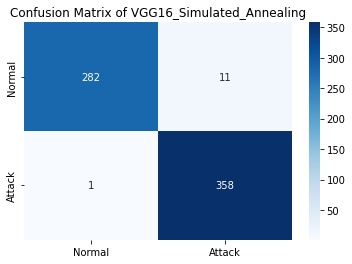

In [35]:
target_names = ['Normal', 'Attack']
conf_mat1 = confusion_matrix(y_test, prediction2)
sns.heatmap(conf_mat1, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG16_Simulated_Annealing')
plt.show()

# Random Search

In [36]:
def Prediction_Model(output_unit, frozen, unit, epochs,patience, lr, dropout_rate,verbose=2, savepath='./Saved Models w All Features/VGG16_random.h5',input_shape=input_img):
    
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True
        
    model = Flatten()(base_model.output)
    model=Dense(units = unit, activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='vgg')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=savepath, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', 
                                                          verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [37]:
#15-18
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Prediction_Model(output_unit=1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(vgg_model=load_model('./Saved Models w All Features/VGG16_random.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [38]:
space = {
    'frozen': hp.quniform('frozen', 15, 18, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
            space=space,
            algo=rand.suggest,
            max_evals=10)
print("Best Optimal Parameters using Random Search {}".format(optimal_parameter))


Epoch 1/20                                            

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                      
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 8s - loss: 1.8251 - accuracy: 0.6283 - val_loss: 0.6886 - val_accuracy: 0.5506 - 8s/epoch - 185ms/step

Epoch 2/20                                            

                                                      
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.6543 - accuracy: 0.6808 - val_loss: 0.6934 - val_accuracy: 0.5506 - 5s/epoch - 122ms/step

Epoch 3/20                                            

                                                      
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.6318 - accuracy: 0.6808 - val_loss: 0.7126 - val_accuracy: 0.5506 - 5s/epoch - 125ms/step

Epoch 4/20                                            

                                                      
Epoch 4: val_accuracy did not improve from 0.55061

44/4

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.84509, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 1.8335 - accuracy: 0.8792 - val_loss: 2.1912 - val_accuracy: 0.8451 - 7s/epoch - 163ms/step

Epoch 2/10                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.84509 to 0.86043, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 6s - loss: 0.1567 - accuracy: 0.9784 - val_loss: 1.7780 - val_accuracy: 0.8604 - 6s/epoch - 142ms/step

Epoch 3/10                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.86043 to 0.86196, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 6s

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.82515, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 0.4111 - accuracy: 0.8864 - val_loss: 0.4425 - val_accuracy: 0.8252 - 7s/epoch - 161ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.82515 to 0.86963, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 6s - loss: 0.0749 - accuracy: 0.9835 - val_loss: 0.4820 - val_accuracy: 0.8696 - 6s/epoch - 143ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.86963 to 0.97393, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 6s

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 11s - loss: 9.6565 - accuracy: 0.6175 - val_loss: 0.7467 - val_accuracy: 0.5506 - 11s/epoch - 245ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.55061 to 0.75153, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 10s - loss: 0.6763 - accuracy: 0.7060 - val_loss: 2.1720 - val_accuracy: 0.7515 - 10s/epoch - 229ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.75153 to 0.95859, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.78681, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 0.6208 - accuracy: 0.8648 - val_loss: 0.4973 - val_accuracy: 0.7868 - 7s/epoch - 170ms/step

Epoch 2/30                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.78681 to 0.85890, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 0.0462 - accuracy: 0.9885 - val_loss: 0.2654 - val_accuracy: 0.8589 - 7s/epoch - 150ms/step

Epoch 3/30                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.85890 to 0.87270, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.83436, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 8s - loss: 1.6871 - accuracy: 0.8763 - val_loss: 1.4715 - val_accuracy: 0.8344 - 8s/epoch - 180ms/step

Epoch 2/10                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.83436 to 0.84509, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 0.0605 - accuracy: 0.9856 - val_loss: 0.8668 - val_accuracy: 0.8451 - 7s/epoch - 163ms/step

Epoch 3/10                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.84509 to 0.84816, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.85429, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 8s - loss: 1.0851 - accuracy: 0.8771 - val_loss: 0.4459 - val_accuracy: 0.8543 - 8s/epoch - 175ms/step

Epoch 2/30                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.85429 to 0.91718, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 0.0469 - accuracy: 0.9885 - val_loss: 0.1529 - val_accuracy: 0.9172 - 7s/epoch - 150ms/step

Epoch 3/30                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.91718

44/44 - 5s - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.4294 - val_accurac

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.68558, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 8s - loss: 5.5338 - accuracy: 0.6535 - val_loss: 0.5959 - val_accuracy: 0.6856 - 8s/epoch - 176ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.68558 to 0.85276, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 11s - loss: 0.1631 - accuracy: 0.9468 - val_loss: 0.2768 - val_accuracy: 0.8528 - 11s/epoch - 252ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.85276 to 0.87577, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.81288, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 12s - loss: 1.4501 - accuracy: 0.8893 - val_loss: 1.5869 - val_accuracy: 0.8129 - 12s/epoch - 280ms/step

Epoch 2/10                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.81288 to 0.84969, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 0.0545 - accuracy: 0.9842 - val_loss: 0.4002 - val_accuracy: 0.8497 - 7s/epoch - 163ms/step

Epoch 3/10                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.84969

44/44 - 5s - loss: 0.0109 - accuracy: 0.9978 - val_loss: 0.9122 - val_accur

<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.82975, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 8s - loss: 0.5054 - accuracy: 0.9037 - val_loss: 0.5608 - val_accuracy: 0.8298 - 8s/epoch - 185ms/step

Epoch 2/30                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.82975 to 0.86350, saving model to ./Saved Models w All Features/VGG16_random.h5

44/44 - 7s - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.3006 - val_accuracy: 0.8635 - 7s/epoch - 158ms/step

Epoch 3/30                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.86350

44/44 - 5s - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.3054 - val_accurac

In [39]:
Prediction_Model(output_unit = 1, frozen = 17, unit = 384, epochs = 30, patience = 6, lr = 0.002, dropout_rate = 0.4, verbose = 1)

Epoch 1/30


<ipython-input-36-51f4e634fa1e>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 0.8111 - accuracy: 0.9044
Epoch 1: val_accuracy improved from -inf to 0.82362, saving model to ./Saved Models w All Features/VGG16_random.h5
44/44 [==============================] - 8s 163ms/step - loss: 0.8111 - accuracy: 0.9044 - val_loss: 0.7790 - val_accuracy: 0.8236
Epoch 2/30
44/44 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9892
Epoch 2: val_accuracy improved from 0.82362 to 0.97699, saving model to ./Saved Models w All Features/VGG16_random.h5
44/44 [==============================] - 7s 157ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.0829 - val_accuracy: 0.9770
Epoch 3/30
44/44 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9863
Epoch 3: val_accuracy did not improve from 0.97699
44/44 [==============================] - 5s 123ms/step - loss: 0.0545 - accuracy: 0.9863 - val_loss: 0.7827 - val_accuracy: 0.8650
Epoch 4/30
44/44 [==============================] - 

In [40]:
model3 = load_model('./Saved Models w All Features/VGG16_random.h5')

In [41]:
prediction3 = model3.predict(images)
prediction3 = (prediction3 > 0.5).astype(int)

In [42]:
accuracy3 = accuracy_score(y_test, prediction3)
precision3 =precision_score(y_test, prediction3, average='weighted')
recall3 = recall_score(y_test, prediction3, average='weighted')
f1_3 = f1_score(y_test, prediction3, average='weighted')

output2 = (
    "Evaluation Metrics of VGG16_Random_Search:\n"
    f"Testing Accuracy: {accuracy3 * 100}\n"
    f"Precision: {precision3}\n"
    f"Recall: {recall3}\n"
    f"F1-Score: {f1_3}"
)

print(output2)


Evaluation Metrics of VGG16_Random_Search:
Testing Accuracy: 97.69938650306749
Precision: 0.9779165709786423
Recall: 0.9769938650306749
F1-Score: 0.9769270798879589


In [43]:
target_names = ['Normal', 'Attack']
print(classification_report(y_test, prediction3, target_names=target_names))


              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97       293
      Attack       0.96      1.00      0.98       359

    accuracy                           0.98       652
   macro avg       0.98      0.97      0.98       652
weighted avg       0.98      0.98      0.98       652



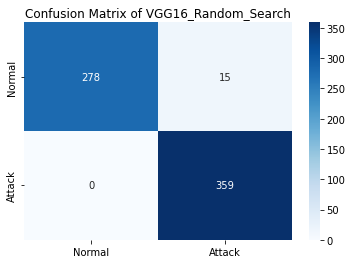

In [44]:
target_names = ['Normal', 'Attack']
conf_mat1 = confusion_matrix(y_test, prediction3)
sns.heatmap(conf_mat1, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG16_Random_Search')
plt.show()

# Ensemble Learning


In [45]:
model1 =load_model('./Saved Models w All Features/VGG16_tpe.h5')
model2 =load_model('./Saved Models w All Features/VGG16_simulated.h5')
model3 = load_model('./Saved Models w All Features/VGG16_random.h5')

In [46]:
models = [model1, model2, model3]

preds = [model.predict(images) for model in models]

In [47]:
preds=np.array(preds)
preds.shape

(3, 652, 1)

In [48]:
summed = np.sum(preds, axis=0)

In [17]:
#ensemble_prediction = np.argmax(summed, axis=1)

In [49]:
ensemble_prediction = (summed > 0.5).astype(int).flatten()

In [50]:
ensemble_prediction.shape

(652,)

In [51]:
prediction1 = (model1.predict(images) > 0.5).astype(int).flatten()

In [52]:
prediction2 = (model2.predict(images) > 0.5).astype(int).flatten()


In [53]:
prediction3 = (model3.predict(images) > 0.5).astype(int).flatten()


In [54]:
accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
#ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print(accuracy1, accuracy2, accuracy3)

0.9831288343558282 0.9815950920245399 0.9769938650306749


In [55]:
misclassified1 = np.sum(y_test != prediction1)
misclassified2 = np.sum(y_test != prediction2)
misclassified3 = np.sum(y_test != prediction3)
print(misclassified1, misclassified2, misclassified3)

11 12 15


In [56]:
w1 = 1/(misclassified1 + 0.001)
w2 = 1/(misclassified2 + 0.001)
w3 = 1/(misclassified3 + 0.001)

sum_weights = w1 + w2 + w3

normalized_w1 = w1 / sum_weights
normalized_w2 = w2 / sum_weights
normalized_w3 = w3 / sum_weights

print(w1, w2, w3)
print(normalized_w1, normalized_w2, normalized_w3)

0.0909008271975275 0.08332638946754438 0.06666222251849876
0.37735497041967125 0.3459113431869681 0.27673368639336066


In [57]:
weights = [normalized_w1, normalized_w2, normalized_w3]
weighted_prediction = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = (weighted_prediction > 0.5).astype(int).flatten()

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)
ensemble_precision =precision_score(y_test, weighted_ensemble_prediction, average='weighted')
ensemble_recall = recall_score(y_test, weighted_ensemble_prediction, average='weighted')
ensemble_f1 = f1_score(y_test, weighted_ensemble_prediction, average='weighted')

output2 = (
    "Evaluation Metrics of Ensemble Learning with Optimized Weight:\n"
    f"Testing Accuracy: {weighted_accuracy * 100}\n"
    f"Precision: {ensemble_precision}\n"
    f"Recall: {ensemble_recall}\n"
    f"F1-Score: {ensemble_f1}"
)

print(output2)

Evaluation Metrics of Ensemble Learning with Optimized Weight:
Testing Accuracy: 98.77300613496932
Precision: 0.9878744824690273
Recall: 0.9877300613496932
F1-Score: 0.9877174384370028


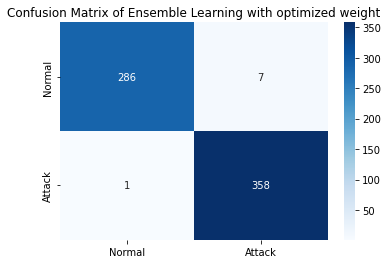

In [58]:
target_names = ["Normal", "Attack"]
conf_mat4 = confusion_matrix(y_test, weighted_ensemble_prediction)
sns.heatmap(conf_mat4, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Ensemble Learning with optimized weight')
plt.show()